**Presentado por:** 

Juan Camilo Gutierrez Hoyos 
y Jose David Santacruz Guerrero

## **IMPORTACION LIBRERIA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## **EXTRACCION DEL DATASET**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
df = pd.read_csv(url, header = None, sep='\t', names=['Frequency','Angle_attack','Chord_length','velocity','Suction_displacement_thickness','Scaled_sound'])
df

,Frequency,Angle_attack,Chord_length,velocity,Suction_displacement_thickness,Scaled_sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


## **VALIDACION DEL DATASET**

In [ ]:
df.info()
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Frequency                       1503 non-null   int64  
 1   Angle_attack                    1503 non-null   float64
 2   Chord_length                    1503 non-null   float64
 3   velocity                        1503 non-null   float64
 4   Suction_displacement_thickness  1503 non-null   float64
 5   Scaled_sound                    1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


,Total,%
Frequency,0,0.0
Angle_attack,0,0.0
Chord_length,0,0.0
velocity,0,0.0
Suction_displacement_thickness,0,0.0
Scaled_sound,0,0.0


## **OBTENCION DE VARIABLES ESTIMADORAS**

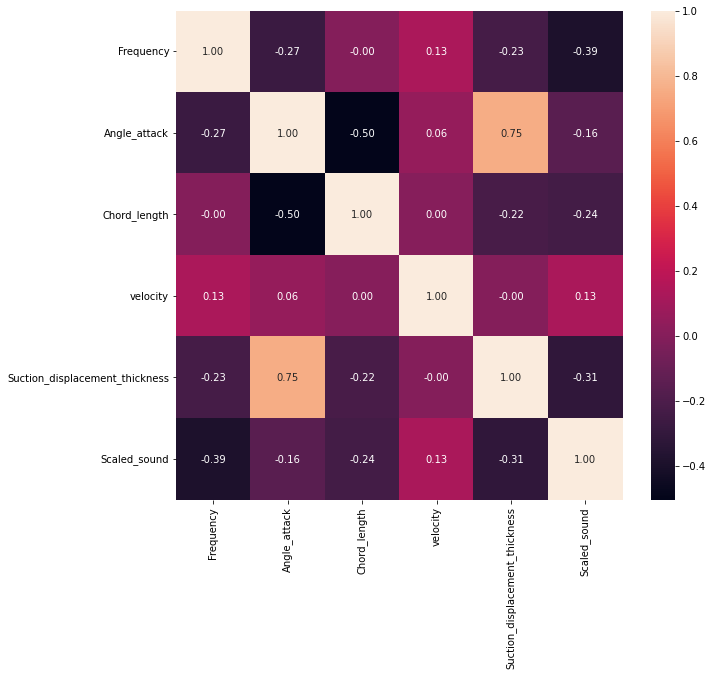

In [ ]:
corr = df.corr()
plt.subplots(figsize=(10,9))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

<Figure size 432x288 with 0 Axes>

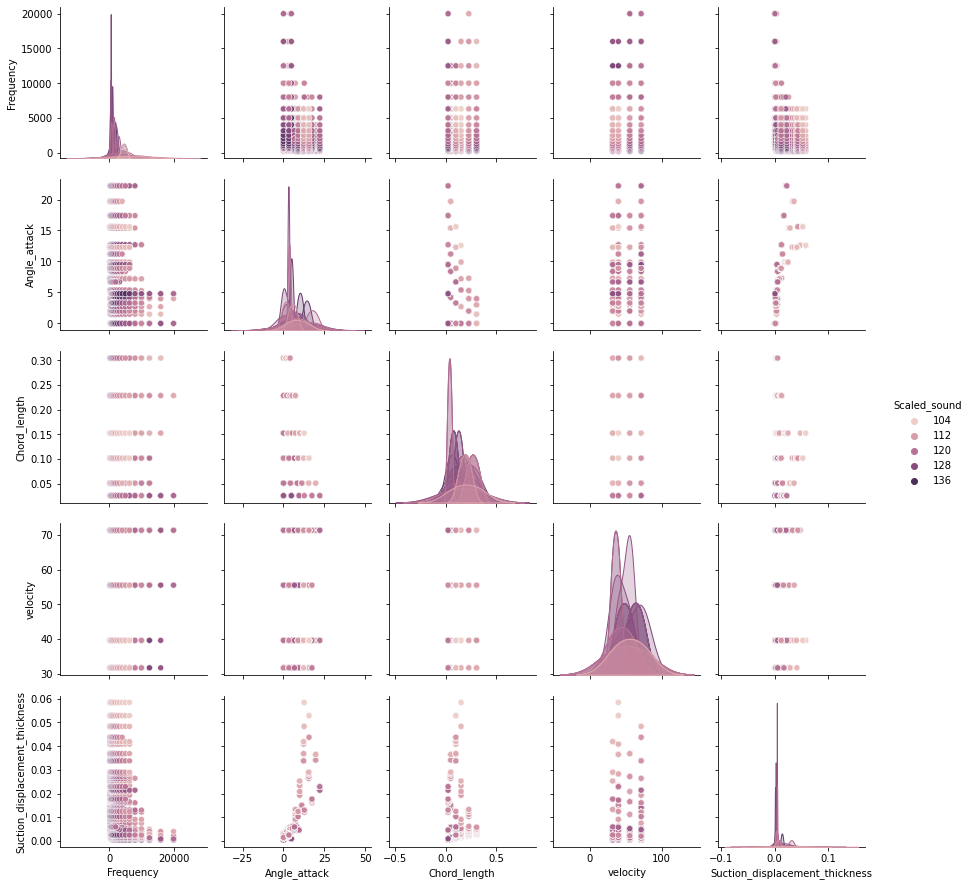

In [ ]:
plt.figure()
sns.pairplot(df, hue="Scaled_sound")

## **NORMALIZACION DE LOS DATOS**

In [ ]:
X = df.iloc[:,[0,2,4]]
Y = df['Scaled_sound']

scaler1 = MinMaxScaler(feature_range=(-1, 1))
scaler1.fit(X)
X_n = scaler1.transform(X)
X_n = np.array(X_n)

scaler2 = MinMaxScaler(feature_range=(-1, 1))
Y_n = Y.values
Y_n = Y_n.reshape(-1,1)

scaler2.fit(Y_n)
Y_n = scaler2.transform(Y_n)
Y_n = np.array(Y_n)

print(X_n.shape,Y_n.shape)

(1503, 3) (1503, 1)


## **DIVISION DEL DATASET**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1052, 3)
(451, 3)
(1052, 1)
(451, 1)


## **MODELO LINEAR REGRESSION SKLEARN**

### **CREACION Y ENTRENAMIENTO**

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

### **VALIDACION DEL MODELO**

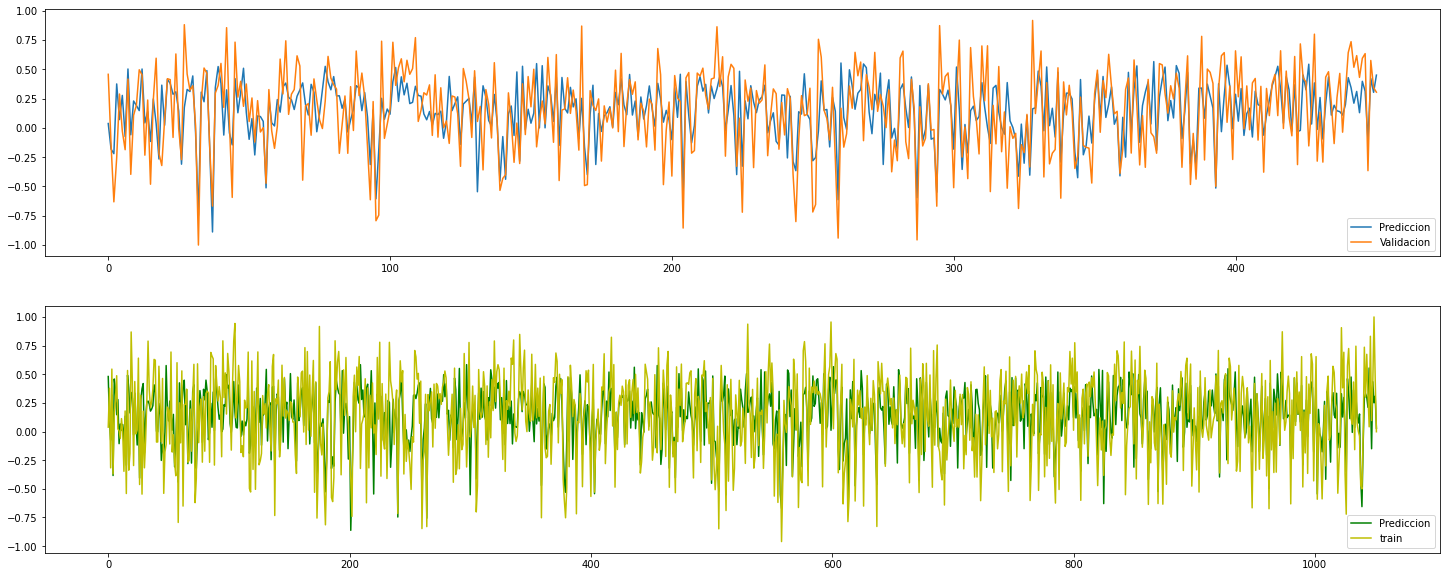

In [56]:
Y_predict_test = linear_model.predict(X_test)
Y_predict_train = linear_model.predict(X_train)

fig, axs = plt.subplots(2, 1,figsize=(25,10))

axs[0].plot(Y_predict_test,'-', label='Prediccion')
axs[0].plot(Y_test,'-', label='Validacion')
axs[0].legend(loc='lower right')

axs[1].plot(Y_predict_train,'-g', label='Prediccion')
axs[1].plot(Y_train,'-y', label='train')
axs[1].legend(loc='lower right')

In [ ]:
presicion_test_1 = 1 - mean_squared_error(Y_test,Y_predict_test)
error_test_1 = mean_squared_error(Y_test,Y_predict_test)

presicion_train_1 = 1 - mean_squared_error(Y_train,Y_predict_train)
error_train_1 = mean_squared_error(Y_train,Y_predict_train)

print('Validacion, presicion del modelo:',presicion_test_1, 'Error del modelo:', error_test_1)
print('Entrenamiento, presicion del modelo:',presicion_train_1, 'Error del modelo:', error_train_1)
print("Coeficiente:", list(zip(X.columns, linear_model.coef_.flatten(), )))

Validacion, presicion del modelo: 0.9276762663386161 Error del modelo: 0.07232373366138387
Entrenamiento, presicion del modelo: 0.9232982261198153 Error del modelo: 0.07670177388018477
Coeficiente: [('Frequency', -0.5766562119597152), ('Chord_length', -0.20115041827613758), ('Suction_displacement_thickness', -0.40864272309961763)]


## **MODELO RIDGE SKLEARN**

### **CREACION Y ENTRENAMIENTO**

In [ ]:
Ridge_sklearn = Ridge(alpha=0.5)
Ridge_sklearn.fit(X_train,Y_train)

Ridge(alpha=0.5)

### **VALIDACION DEL MODELO**

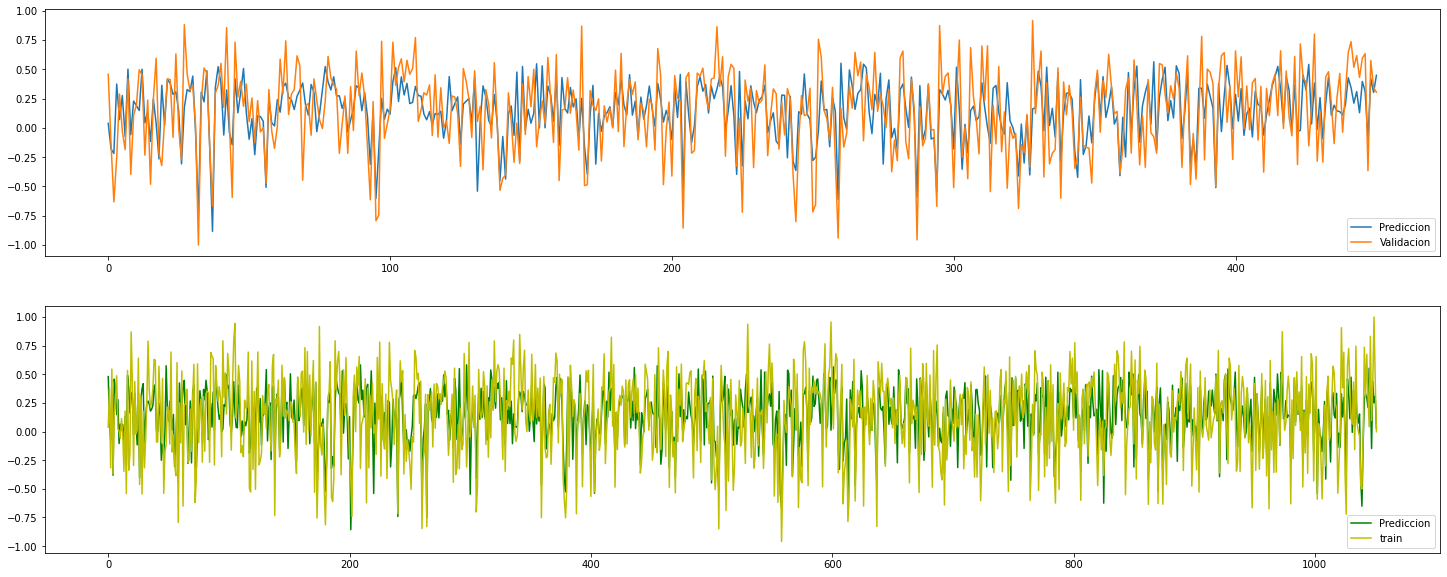

In [57]:
Y_predict_ridge_test = Ridge_sklearn.predict(X_test)
Y_predict_ridge_train = Ridge_sklearn.predict(X_train)

fig, axs = plt.subplots(2, 1,figsize=(25,10))

axs[0].plot(Y_predict_ridge_test,'-', label='Prediccion')
axs[0].plot(Y_test,'-', label='Validacion')
axs[0].legend(loc='lower right')

axs[1].plot(Y_predict_ridge_train,'-g', label='Prediccion')
axs[1].plot(Y_train,'-y', label='train')
axs[1].legend(loc='lower right')

In [ ]:
presicion_test_2 = 1 - mean_squared_error(Y_test,Y_predict_ridge_test)
error_test_2 = mean_squared_error(Y_test,Y_predict_ridge_test)

presicion_train_2 = 1 - mean_squared_error(Y_train,Y_predict_ridge_train)
error_train_2 = mean_squared_error(Y_train,Y_predict_ridge_train)

print('Validacion, presicion del modelo:',presicion_test_2, 'Error del modelo:', error_test_2)
print('Entrenamiento, presicion del modelo:',presicion_train_2, 'Error del modelo:', error_train_2)
print("Coeficiente:", list(zip(X.columns, Ridge_sklearn.coef_.flatten(), )))

Validacion, presicion del modelo: 0.9276610406656401 Error del modelo: 0.0723389593343599
Entrenamiento, presicion del modelo: 0.9232969664693776 Error del modelo: 0.07670303353062237
Coeficiente: [('Frequency', -0.5733645669932295), ('Chord_length', -0.20069266862310642), ('Suction_displacement_thickness', -0.40699374214273787)]


## **MODELO LASSO SKLEARN**

### **CREACION Y ENTRENAMIENTO**

In [82]:
Lasso_sklearn = Lasso(alpha=1e-2)
Lasso_sklearn.fit(X_train,Y_train)

Lasso(alpha=0.01)

### **VALIDACION DEL MODELO**

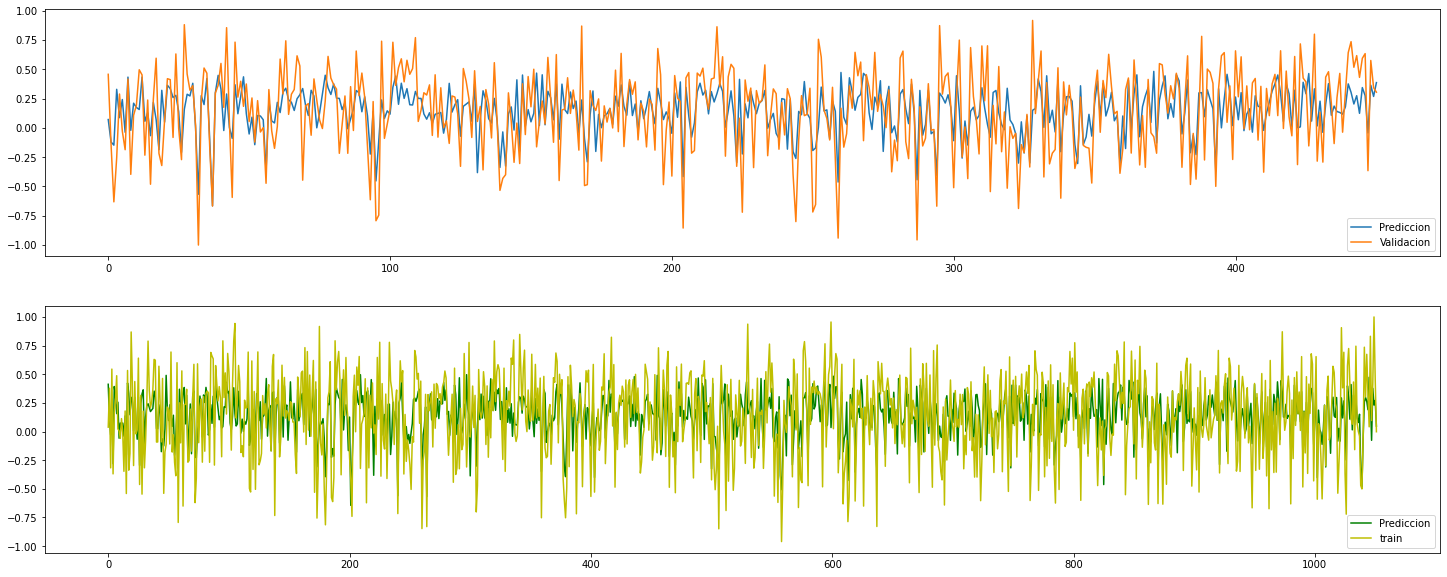

In [83]:
Y_predict_lasso_test = Lasso_sklearn.predict(X_test)
Y_predict_lasso_train = Lasso_sklearn.predict(X_train)

fig, axs = plt.subplots(2, 1,figsize=(25,10))

axs[0].plot(Y_predict_lasso_test,'-', label='Prediccion')
axs[0].plot(Y_test,'-', label='Validacion')
axs[0].legend(loc='lower right')

axs[1].plot(Y_predict_lasso_train,'-g', label='Prediccion')
axs[1].plot(Y_train,'-y', label='train')
axs[1].legend(loc='lower right')

In [84]:
presicion_test_3 = 1 - mean_squared_error(Y_test,Y_predict_lasso_test)
error_test_3 = mean_squared_error(Y_test,Y_predict_lasso_test)

presicion_train_3 = 1 - mean_squared_error(Y_train,Y_predict_lasso_train)
error_train_3 = mean_squared_error(Y_train,Y_predict_lasso_train)

print('Validacion, presicion del modelo:',presicion_test_3, 'Error del modelo:', error_test_3)
print('Entrenamiento, presicion del modelo:',presicion_train_3, 'Error del modelo:', error_train_3)
print("Coeficiente:", list(zip(X.columns, Lasso_sklearn.coef_.flatten(), )))

Validacion, presicion del modelo: 0.9249477578436688 Error del modelo: 0.07505224215633118
Entrenamiento, presicion del modelo: 0.9208573484268564 Error del modelo: 0.07914265157314364
Coeficiente: [('Frequency', -0.4486160468631851), ('Chord_length', -0.16692953338309868), ('Suction_displacement_thickness', -0.32681918363290435)]


## **MODELO ECUACION NORMAL**

### **CREACION Y ENTRENAMIENTO**

In [ ]:
X_train_stack = np.hstack((np.ones((X_train.shape[0],1)), X_train))
XT = X_train_stack.T 

theta = np.dot(np.linalg.inv(np.dot(XT,X_train_stack)),np.dot(XT,Y_train))
print(theta)

[[-0.57805617]
 [-0.57665621]
 [-0.20115042]
 [-0.40864272]]


### **VALIDACION DEL MODELO**

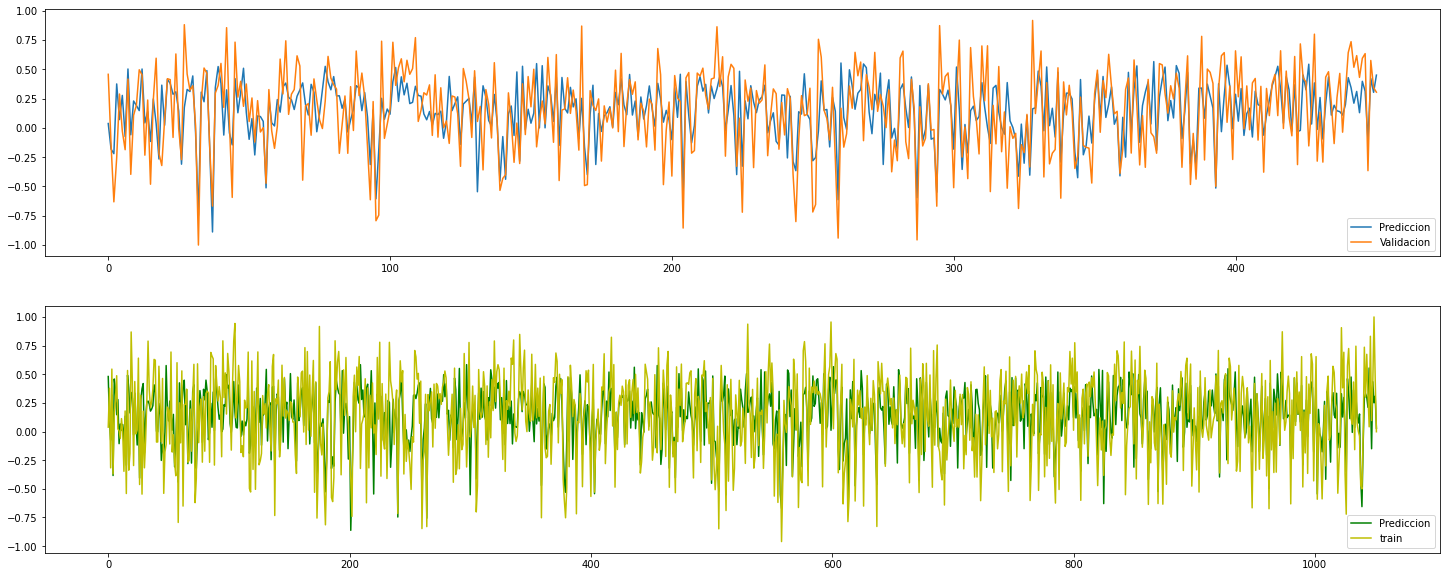

In [59]:
X_test_stack = np.hstack((np.ones((X_test.shape[0],1)), X_test))
Y_predict_normal_test = np.dot(X_test_stack,theta)
Y_predict_normal_train = np.dot(X_train_stack,theta)

fig, axs = plt.subplots(2, 1,figsize=(25,10))

axs[0].plot(Y_predict_normal_test,'-', label='Prediccion')
axs[0].plot(Y_test,'-', label='Validacion')
axs[0].legend(loc='lower right')

axs[1].plot(Y_predict_normal_train,'-g', label='Prediccion')
axs[1].plot(Y_train,'-y', label='train')
axs[1].legend(loc='lower right')

In [ ]:
presicion_test_4 = 1 - mean_squared_error(Y_test,Y_predict_normal_test)
error_test_4 = mean_squared_error(Y_test,Y_predict_normal_test)

presicion_train_4 = 1 - mean_squared_error(Y_train,Y_predict_normal_train)
error_train_4 = mean_squared_error(Y_train,Y_predict_normal_train)

print('Validacion, presicion del modelo:',presicion_test_4, 'Error del modelo:', error_test_4)
print('Entrenamiento, presicion del modelo:',presicion_train_4, 'Error del modelo:', error_train_4)
print("Coeficiente:", list(zip(X.columns,theta[1:])))

Validacion, presicion del modelo: 0.9276762663386161 Error del modelo: 0.0723237336613839
Entrenamiento, presicion del modelo: 0.9232982261198153 Error del modelo: 0.07670177388018477
Coeficiente: [('Frequency', array([-0.57665621])), ('Chord_length', array([-0.20115042])), ('Suction_displacement_thickness', array([-0.40864272]))]


## **MODELO FUNCION GRADIENTE**

### **DEFINICION DE LA FUNCION**

In [ ]:
#funcion gradiente 
def f_gradiente(x, y, theta, learning_rate=0.1, num_epochs=10):
  n_filas = x.shape[0]
  J_all = []

  for i in range(num_epochs):
    y_iter = np.dot(x,theta)
    cost = (1/n_filas)*(x.T@(y_iter - y))
    theta = theta - (learning_rate)*cost
    J_all.append(((np.dot(x, theta)-y).T@(np.dot(x, theta)-y))/(2*y.shape[0]))
    
  return theta,J_all

### **CREACION Y ENTRENAMIENTO**

In [74]:
theta_zeros = np.zeros((X_train_stack.shape[1], 1))
theta_learn,J_all = f_gradiente(X_train_stack,Y_train , theta_zeros, learning_rate=0.5, num_epochs=1000)
print(theta_learn)

[[-0.57805617]
 [-0.57665621]
 [-0.20115042]
 [-0.40864272]]


### **GRAFICO DE COSTO**

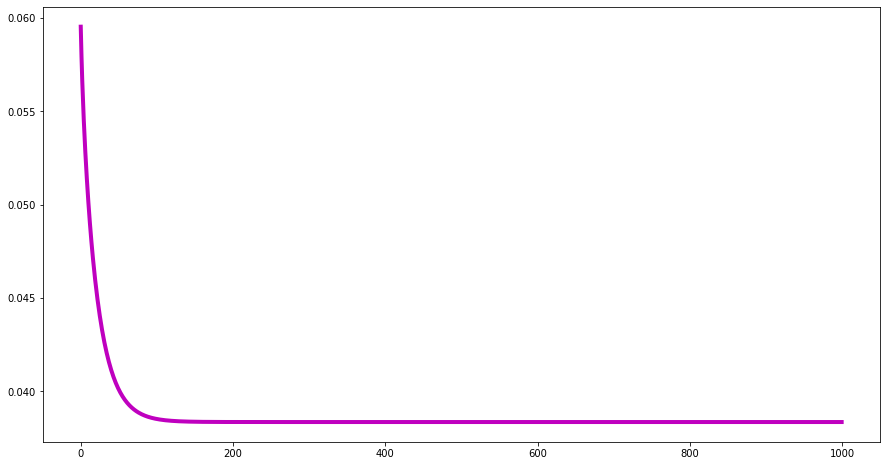

In [75]:
n_epochs = []
jplot = []
count = 0

for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)

plt.subplots(figsize=(15,8))
plt.plot(n_epochs, jplot, 'm', linewidth = "4")
plt.show()

### **VALIDACION DEL MODELO**

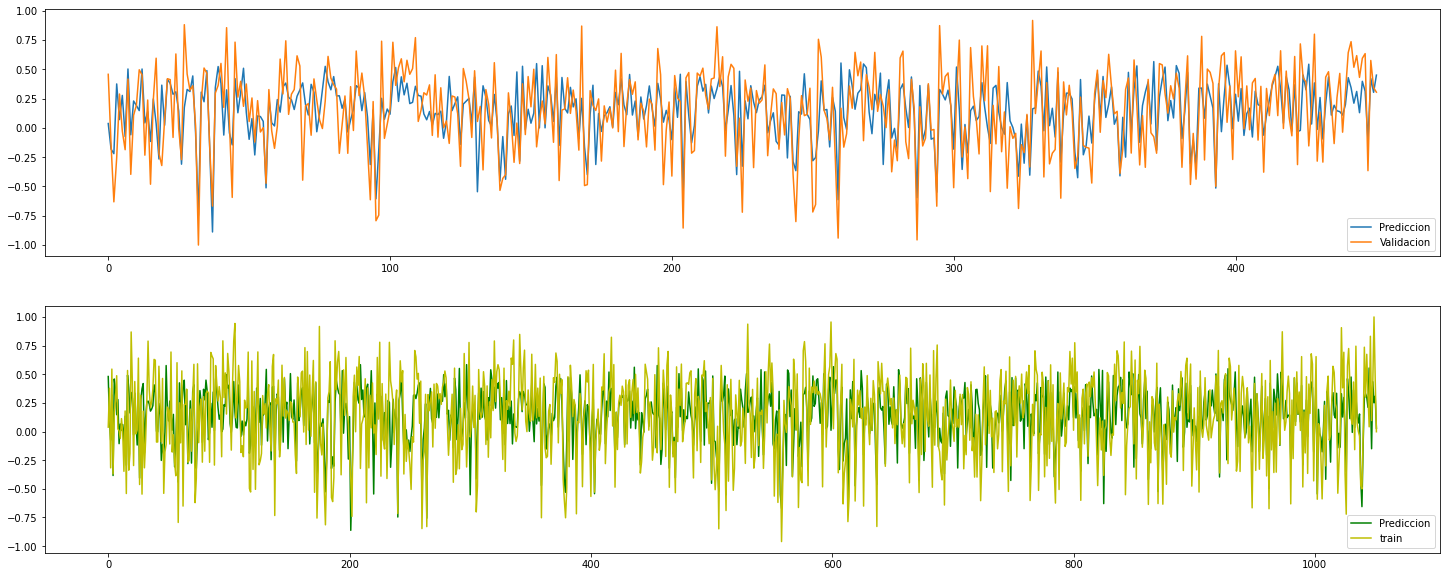

In [60]:
Y_predict_fgradiente_test = np.dot(X_test_stack,theta_learn)
Y_predict_fgradiente_train = np.dot(X_train_stack,theta_learn)

fig, axs = plt.subplots(2, 1,figsize=(25,10))

axs[0].plot(Y_predict_fgradiente_test,'-', label='Prediccion')
axs[0].plot(Y_test,'-', label='Validacion')
axs[0].legend(loc='lower right')

axs[1].plot(Y_predict_fgradiente_train,'-g', label='Prediccion')
axs[1].plot(Y_train,'-y', label='train')
axs[1].legend(loc='lower right')

In [ ]:
presicion_test_5 = 1 - mean_squared_error(Y_test,Y_predict_fgradiente_test)
error_test_5 = mean_squared_error(Y_test,Y_predict_fgradiente_test)

presicion_train_5 = 1 - mean_squared_error(Y_train,Y_predict_fgradiente_train)
error_train_5 = mean_squared_error(Y_train,Y_predict_fgradiente_train)

print('Validacion, presicion del modelo:',presicion_test_5, 'Error del modelo:', error_test_5)
print('Entrenamiento, presicion del modelo:',presicion_train_5, 'Error del modelo:', error_train_5)
print("Coeficiente:", list(zip(X.columns,theta_learn[1:])))

Validacion, presicion del modelo: 0.9276762663384768 Error del modelo: 0.07232373366152327
Entrenamiento, presicion del modelo: 0.9232982261198153 Error del modelo: 0.07670177388018479
Coeficiente: [('Frequency', array([-0.57665621])), ('Chord_length', array([-0.20115042])), ('Suction_displacement_thickness', array([-0.40864272]))]
